# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Animal_Study= pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID",)

# Display the data table for preview
display(Animal_Study.head())

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
NumberOfMouse = Animal_Study["Mouse ID"].nunique()
NumberOfMouse


249

In [3]:
duplicates = Animal_Study.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

# Create a new dataframe with the duplicate mice
duplicate_mice = Animal_Study[duplicates]['Mouse ID'].unique()

# Print the list of duplicate mice
display(duplicate_mice)


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_df = Animal_Study[Animal_Study["Mouse ID"] == "g989"]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= Animal_Study[Animal_Study["Mouse ID"] != "g989"]

display(clean_df.head())

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
display(clean_df["Mouse ID"].nunique())



248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_groups= clean_df.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume = regimen_groups['Tumor Volume (mm3)'].mean()
median_tumor_volume = regimen_groups['Tumor Volume (mm3)'].median()
var_tumor_volume = regimen_groups['Tumor Volume (mm3)'].var()
std_tumor_volume = regimen_groups['Tumor Volume (mm3)'].std()
sem_tumor_volume = regimen_groups['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe
summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': var_tumor_volume,
    'Tumor Volume Std. Dev.': std_tumor_volume,
    'Tumor Volume Std. Err.': sem_tumor_volume
})
display(summary_df)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats = regimen_groups['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
display(summary_stats)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

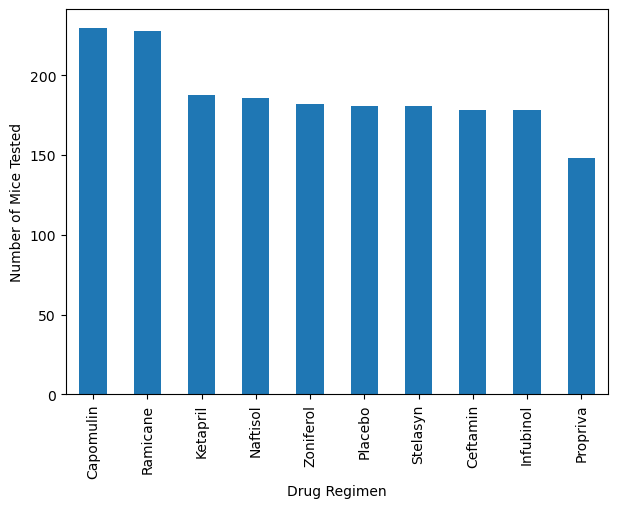

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#searching from net

regimen_timepoints = regimen_groups['Timepoint'].count().sort_values(ascending=False)

regimen_timepoints.plot(kind='bar', figsize=(7,5))

# Add labels and title to the plot
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')


# Show the plot
plt.show()

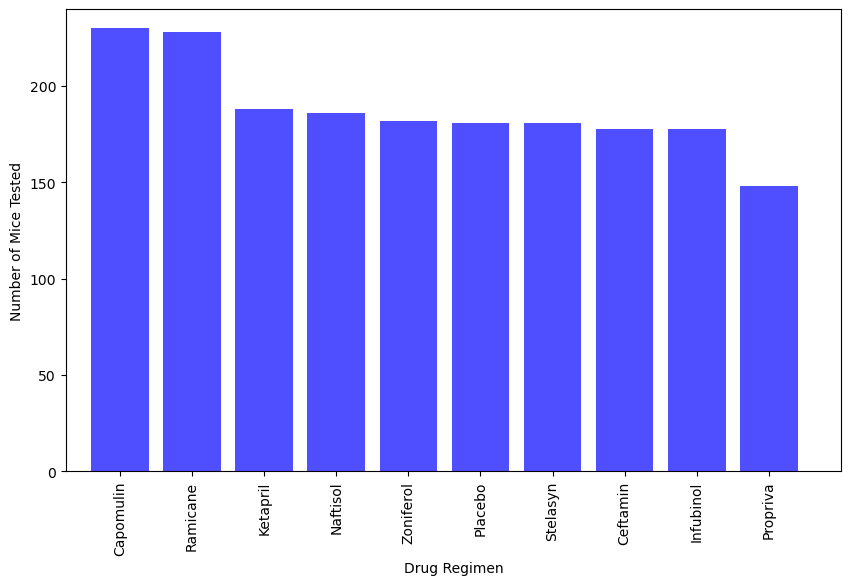

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
regimen_tp= regimen_groups['Timepoint'].count().sort_values(ascending=False)
x_axis = np.arange(len(regimen_tp))
x_range = list(regimen_tp.index)
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,6))
plt.bar(x_axis, regimen_tp,color= 'b', alpha=0.69, align='center')
plt.xticks(tick_locations, x_range, rotation="vertical")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xlim(-0.75, len(x_axis))
plt.ylim(0,max(regimen_tp)+10)
plt.show()


Male      958
Female    922
Name: Sex, dtype: int64

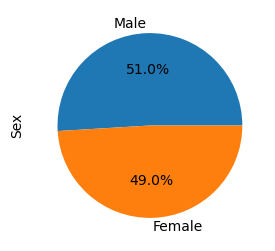

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_c = clean_df['Sex'].value_counts()
display(sex_c)

sex_c.plot(kind='pie', autopct='%1.1f%%', startangle=0, figsize=(3, 3))

plt.show()


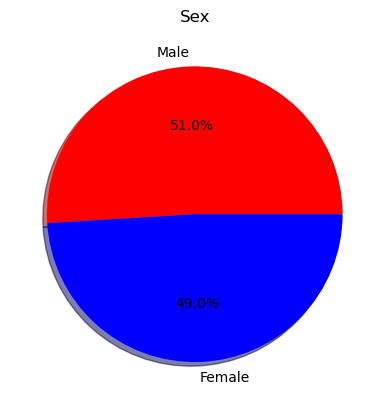

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labals=["Male","Female"]
Colors=["Red","Blue"]
plt.title("Sex")
plt.pie(sex_c,labels=labals, colors= Colors,autopct="%1.1f%%",
       shadow=True, startangle=0)
plt.show()

## Quartiles, Outliers and Boxplots

In [116]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].last()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol  = pd.merge(clean_df, greatest_timepoint, on=['Mouse ID', 'Timepoint'], how= 'right')
final_tumor_vol.reset_index(drop=True)

final_tumor_vol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [115]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    
    treatment_df = final_tumor_vol[final_tumor_vol['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    quartiles = treatment_df.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    outliers = treatment_df.loc[(treatment_df < lower_bound) | (treatment_df > upper_bound)]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes.append(treatment_df)
    

    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


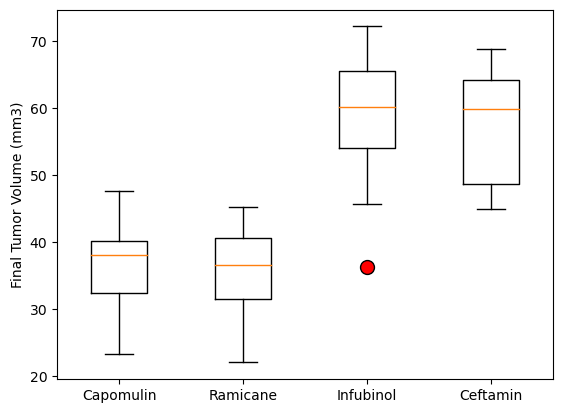

In [117]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
flierprops = dict(marker='o', markersize=10, markerfacecolor='red', markeredgecolor='Black')
ax.boxplot(tumor_volumes, labels=treatment_list, showfliers=True, 
          flierprops=flierprops )
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

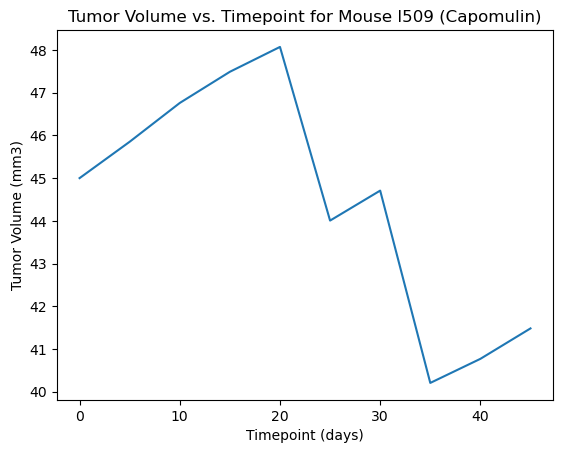

In [118]:
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

mouse_id = 'l509'

mouse_df = capomulin_df[capomulin_df['Mouse ID'] == mouse_id]


plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'])
plt.title(f"Tumor Volume vs. Timepoint for Mouse {mouse_id} (Capomulin)")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()




The correlation between mouse weight and average tumor volume is: 0.84


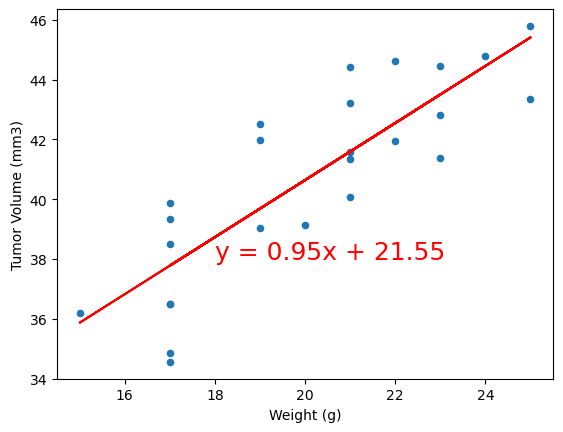

In [119]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_avg_df = capomulin_df.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"})

capomulin_avg_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")

correlation , _ = st.pearsonr(capomulin_avg_df["Weight (g)"], capomulin_avg_df["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and average tumor volume is: {correlation:.2f}")
from scipy.stats import linregress
x_values = capomulin_avg_df["Weight (g)"]
y_values = capomulin_avg_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,38),fontsize=18,color="red")
plt.show()


## Correlation and Regression

In [125]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation , _ = st.pearsonr(capomulin_avg_df["Weight (g)"], capomulin_avg_df["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and average tumor volume is: {correlation:.2f}")
x_values = capomulin_avg_df["Weight (g)"]
y_values = capomulin_avg_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The Regression line Equation ==> [{line_eq}]')

The correlation between mouse weight and average tumor volume is: 0.84
The Regression line Equation ==> [y = 0.95x + 21.55]
